In [13]:
import seaborn as sns
import polars as pl
import numpy as np

In [17]:
iris = pl.read_csv("iris.csv")
iris.head(3)

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""


<AxesSubplot:xlabel='species', ylabel='petal_length'>

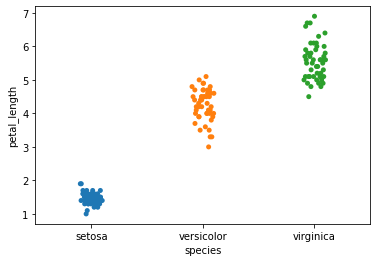

In [15]:
sns.stripplot(x="species",y="petal_length", data=iris.to_pandas())

In [16]:
iris.groupby("species").agg(
    pl.col("petal_length").apply(lambda x: np.percentile(x, 90)).alias("90%")
).sort("90%")

species,90%
str,f64
"""setosa""",1.7
"""versicolor""",4.8
"""virginica""",6.31
